In [1]:
import matplotlib.pyplot as plt
plt.style.use('science')

In [44]:
import pandas as pd
sys.path.insert(1, "/home/blaised/private/Bc2D0MuNuX/OOP_Fit")  # XXX: temporary
from bmlfit import sig_hi_base_sel

# formulate hi-lev sel
HI_LEV_SEL = sig_hi_base_sel(
    _visM_inf=3500,
    _visM_sup=6800,
    _k_antiComb=0.,
    _k_antiVcb=0.375,
).build()  # hi-level sel

# load the prompt-charm WS data
pc_ws = pd.read_pickle(
    "/home/blaised/private/Bc2D0MuNuX/Pipeline/scratch/nominal/DATA/combined/D0MuNu/9.x_invfb/Bc2D0MuNu_ws_sw_xgb.pkl"
).query(f"D0_IPCHI2_OWNPV < 3 and {HI_LEV_SEL}")

In [47]:
plt_config = {
    "range" : [8_000, 15_000],
    "bins" : 30,
    "density" : True,
    "histtype" : "step",
}

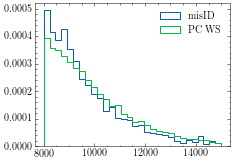

In [48]:
# compare the misID control region
misid = pd.read_pickle(
    "/home/blaised/private/Bc2D0MuNuX/Pipeline/scratch/nominal/DATA/combined/D0MuNu/2018/Bc2D0MuNuX_misid_hadron_enriched_misid_sw_xgb.pkl"
).query(f"{HI_LEV_SEL}")

# upper mass control region
fig, ax = plt.subplots()
_ = ax.hist(
    misid.B_plus_MCORR,
    weights = misid.sw * misid.misid_w,
    label = "misID",
    **plt_config,
)

_ = ax.hist(
    pc_ws.B_plus_MCORR,
    weights = pc_ws.sw,
    label = "PC WS",
    **plt_config,
)

ax.legend()

In [3]:
import hist; from hist import Hist

wh = (
    Hist.new 
    .Regular(30, 3_500, 12_000, name=r"Corrected mass")
    .Regular(30, 0, 1, name=r"MVA")
    .Weight()
    .fill(pc_ws.B_plus_MCORR, pc_ws.XGB_antiComb, 
    weight=pc_ws.sw
    )
    
)   

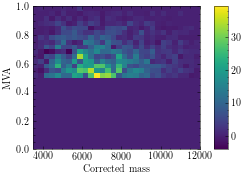

In [4]:
import mplhep

fig, ax = plt.subplots()
mplhep.hist2dplot(wh, ax=ax)
plt.savefig("plots/viz.pdf")


In [5]:
# load the 9 and 5 invfb WS data
ws_9fb_Msel = pd.read_pickle(
    "/home/blaised/private/Bc2D0MuNuX/Pipeline/scratch/nominal/DATA/combined/D0MuNu/9.x_invfb/Bc2D0MuNu_ws_sw_xgb.pkl"
).query(f"{HI_LEV_SEL} and D0_IPCHI2_OWNPV<3")

ws_5fb_Msel = pd.read_pickle(
    "/home/blaised/private/Bc2D0MuNuX/Pipeline/scratch/nominal/DATA/combined/D0MuNu/5.x_invfb/Bc2D0MuNu_ws_sw_xgb.pkl"
).query(f"{HI_LEV_SEL} and D0_IPCHI2_OWNPV<3")


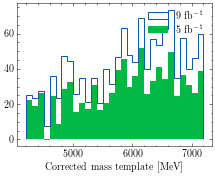

In [35]:
# compare the sWeight'd templates

fig, ax = plt.subplots()


ax.hist(
    ws_9fb_Msel.B_plus_MCORR,
    weights=ws_9fb_Msel.sw,
    label=r"9 fb$^{-1}$",
    histtype="step",
    **plt_config
)

ax.hist(
    ws_5fb_Msel.B_plus_MCORR,
    weights=ws_5fb_Msel.sw,
    label=r"5 fb$^{-1}$",
    **plt_config
)

ax.set_xlabel(r"Corrected mass template [MeV]")
ax.legend()

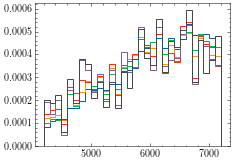

In [27]:
fig, ax = plt.subplots()

for k in (0.0, 0.1, 0.2, 0.3, 0.4, 0.5):
    # formulate hi-lev sel
    HI_LEV_SEL = sig_hi_base_sel(
        _visM_inf=3_500,
        _visM_sup=6285,
        _k_antiComb=k,
        _k_antiVcb=0.375,
    ).build()  # hi-level sel
    
    ax.hist(
        ws_9fb_Msel.query(HI_LEV_SEL).B_plus_MCORR,
        weights=ws_9fb_Msel.query(HI_LEV_SEL).sw,
        label=r"9 fb$^{-1}$" + f" {k}",
        histtype="step",
        **plt_config
    )
